In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\shiro\Downloads\Shopee_Jovee_OmzetPenjualan_perday-shopeebis_omzetperday.csv')
df = df.drop('Tanggal', axis=1)
df = df['penjualan'].values
df

array([ 2133018,  4363851,  3090787,  7999816, 14494222, 19322506,
       15000732, 17140860, 14091330], dtype=int64)

### Develop LSTM Model for Univariate Time Series Forecasting

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[], []
    for i in range(len(timeseries_data)):
        #find the end of this pattern
        end_ix = i + n_features
        #check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [9]:
#define input sequence
timeseries_data = df.copy()
#choose a number of time steps
n_steps = 3
#split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [10]:
print(X), print(y)

[[ 2133018  4363851  3090787]
 [ 4363851  3090787  7999816]
 [ 3090787  7999816 14494222]
 [ 7999816 14494222 19322506]
 [14494222 19322506 15000732]
 [19322506 15000732 17140860]]
[ 7999816 14494222 19322506 15000732 17140860 14091330]


(None, None)

In [11]:
X.shape

(6, 3)

In [12]:
#reshape from [samples, timesteps] into [samples,  timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [15]:
#define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#fit model
model.fit(X, y, epochs=8000,  verbose=1)

Epoch 1/8000
6/6 [==============================] - 3s 489ms/sample - loss: 223535599452160.0000
Epoch 2/8000
6/6 [==============================] - 0s 2ms/sample - loss: 223004046917632.0000
Epoch 3/8000
6/6 [==============================] - 0s 1ms/sample - loss: 222500176789504.0000
Epoch 4/8000
6/6 [==============================] - 0s 890us/sample - loss: 221967483404288.0000
Epoch 5/8000
6/6 [==============================] - 0s 1ms/sample - loss: 221421385023488.0000
Epoch 6/8000
6/6 [==============================] - 0s 870us/sample - loss: 220865891401728.0000
Epoch 7/8000
6/6 [==============================] - 0s 738us/sample - loss: 220199164837888.0000
Epoch 8/8000
6/6 [==============================] - 0s 862us/sample - loss: 219601694621696.0000
Epoch 9/8000
6/6 [==============================] - 0s 1ms/sample - loss: 218991742156800.0000
Epoch 10/8000
6/6 [==============================] - 0s 1ms/sample - loss: 218524597354496.0000
Epoch 11/8000
6/6 [====================

Epoch 86/8000
6/6 [==============================] - 0s 1ms/sample - loss: 81029566038016.0000
Epoch 87/8000
6/6 [==============================] - 0s 1ms/sample - loss: 78123542511616.0000
Epoch 88/8000
6/6 [==============================] - 0s 695us/sample - loss: 75469084950528.0000
Epoch 89/8000
6/6 [==============================] - 0s 668us/sample - loss: 74803608289280.0000
Epoch 90/8000
6/6 [==============================] - 0s 2ms/sample - loss: 72726446342144.0000
Epoch 91/8000
6/6 [==============================] - 0s 2ms/sample - loss: 70613817360384.0000
Epoch 92/8000
6/6 [==============================] - 0s 1ms/sample - loss: 64441769000960.0000
Epoch 93/8000
6/6 [==============================] - 0s 2ms/sample - loss: 61793342849024.0000
Epoch 94/8000
6/6 [==============================] - 0s 2ms/sample - loss: 59730248597504.0000
Epoch 95/8000
6/6 [==============================] - 0s 2ms/sample - loss: 63212154257408.0000
Epoch 96/8000
6/6 [===========================

6/6 [==============================] - 0s 1ms/sample - loss: 36579867361280.0000
Epoch 172/8000
6/6 [==============================] - 0s 1ms/sample - loss: 36360324907008.0000
Epoch 173/8000
6/6 [==============================] - 0s 2ms/sample - loss: 36130166669312.0000
Epoch 174/8000
6/6 [==============================] - 0s 1ms/sample - loss: 35879217266688.0000
Epoch 175/8000
6/6 [==============================] - 0s 1ms/sample - loss: 35609854869504.0000
Epoch 176/8000
6/6 [==============================] - 0s 935us/sample - loss: 35322381467648.0000
Epoch 177/8000
6/6 [==============================] - 0s 2ms/sample - loss: 35016438448128.0000
Epoch 178/8000
6/6 [==============================] - 0s 2ms/sample - loss: 34697841213440.0000
Epoch 179/8000
6/6 [==============================] - 0s 2ms/sample - loss: 34374198231040.0000
Epoch 180/8000
6/6 [==============================] - 0s 2ms/sample - loss: 34052939710464.0000
Epoch 181/8000
6/6 [==============================] -

Epoch 257/8000
6/6 [==============================] - 0s 1ms/sample - loss: 25964568379392.0000
Epoch 258/8000
6/6 [==============================] - 0s 2ms/sample - loss: 25641158180864.0000
Epoch 259/8000
6/6 [==============================] - 0s 1ms/sample - loss: 25321717891072.0000
Epoch 260/8000
6/6 [==============================] - 0s 695us/sample - loss: 25015443521536.0000
Epoch 261/8000
6/6 [==============================] - 0s 1ms/sample - loss: 24727116578816.0000
Epoch 262/8000
6/6 [==============================] - 0s 882us/sample - loss: 24457783541760.0000
Epoch 263/8000
6/6 [==============================] - 0s 2ms/sample - loss: 24205697482752.0000
Epoch 264/8000
6/6 [==============================] - 0s 1ms/sample - loss: 23967427461120.0000
Epoch 265/8000
6/6 [==============================] - 0s 2ms/sample - loss: 23738961625088.0000
Epoch 266/8000
6/6 [==============================] - 0s 1ms/sample - loss: 23516567044096.0000
Epoch 267/8000
6/6 [================

Epoch 343/8000
6/6 [==============================] - 0s 2ms/sample - loss: 15607080681472.0000
Epoch 344/8000
6/6 [==============================] - 0s 747us/sample - loss: 15384150278144.0000
Epoch 345/8000
6/6 [==============================] - 0s 1ms/sample - loss: 15127130669056.0000
Epoch 346/8000
6/6 [==============================] - 0s 863us/sample - loss: 16967923662848.0000
Epoch 347/8000
6/6 [==============================] - 0s 1ms/sample - loss: 16886340255744.0000
Epoch 348/8000
6/6 [==============================] - 0s 2ms/sample - loss: 16803698835456.0000
Epoch 349/8000
6/6 [==============================] - 0s 2ms/sample - loss: 16709826117632.0000
Epoch 350/8000
6/6 [==============================] - 0s 1ms/sample - loss: 16597621145600.0000
Epoch 351/8000
6/6 [==============================] - 0s 2ms/sample - loss: 16463759933440.0000
Epoch 352/8000
6/6 [==============================] - 0s 2ms/sample - loss: 14035365920768.0000
Epoch 353/8000
6/6 [================

Epoch 429/8000
6/6 [==============================] - 0s 2ms/sample - loss: 16377684426752.0000
Epoch 430/8000
6/6 [==============================] - 0s 0s/sample - loss: 16195173482496.0000
Epoch 431/8000
6/6 [==============================] - 0s 952us/sample - loss: 16004093575168.0000
Epoch 432/8000
6/6 [==============================] - 0s 555us/sample - loss: 15814620086272.0000
Epoch 433/8000
6/6 [==============================] - 0s 2ms/sample - loss: 15624612872192.0000
Epoch 434/8000
6/6 [==============================] - 0s 676us/sample - loss: 15434392797184.0000
Epoch 435/8000
6/6 [==============================] - 0s 970us/sample - loss: 15242458300416.0000
Epoch 436/8000
6/6 [==============================] - 0s 693us/sample - loss: 15061656535040.0000
Epoch 437/8000
6/6 [==============================] - 0s 2ms/sample - loss: 14861459259392.0000
Epoch 438/8000
6/6 [==============================] - 0s 787us/sample - loss: 14656535003136.0000
Epoch 439/8000
6/6 [=========

Epoch 514/8000
6/6 [==============================] - 0s 2ms/sample - loss: 11034291077120.0000
Epoch 515/8000
6/6 [==============================] - 0s 2ms/sample - loss: 10964280803328.0000
Epoch 516/8000
6/6 [==============================] - 0s 766us/sample - loss: 10873960660992.0000
Epoch 517/8000
6/6 [==============================] - 0s 2ms/sample - loss: 10768564092928.0000
Epoch 518/8000
6/6 [==============================] - 0s 877us/sample - loss: 10654092099584.0000
Epoch 519/8000
6/6 [==============================] - 0s 2ms/sample - loss: 10548270858240.0000
Epoch 520/8000
6/6 [==============================] - 0s 915us/sample - loss: 10429970513920.0000
Epoch 521/8000
6/6 [==============================] - 0s 2ms/sample - loss: 10317533806592.0000
Epoch 522/8000
6/6 [==============================] - 0s 1ms/sample - loss: 10530764881920.0000
Epoch 523/8000
6/6 [==============================] - 0s 1ms/sample - loss: 10437764579328.0000
Epoch 524/8000
6/6 [==============

Epoch 600/8000
6/6 [==============================] - 0s 1ms/sample - loss: 9039375237120.0000
Epoch 601/8000
6/6 [==============================] - 0s 657us/sample - loss: 8953363693568.0000
Epoch 602/8000
6/6 [==============================] - 0s 808us/sample - loss: 8873989636096.0000
Epoch 603/8000
6/6 [==============================] - 0s 865us/sample - loss: 8800705708032.0000
Epoch 604/8000
6/6 [==============================] - 0s 665us/sample - loss: 8843256922112.0000
Epoch 605/8000
6/6 [==============================] - 0s 1ms/sample - loss: 8785603592192.0000
Epoch 606/8000
6/6 [==============================] - 0s 1ms/sample - loss: 8727935582208.0000
Epoch 607/8000
6/6 [==============================] - 0s 1ms/sample - loss: 8668491284480.0000
Epoch 608/8000
6/6 [==============================] - 0s 671us/sample - loss: 8606162878464.0000
Epoch 609/8000
6/6 [==============================] - 0s 2ms/sample - loss: 7931276296192.0000
Epoch 610/8000
6/6 [====================

Epoch 686/8000
6/6 [==============================] - 0s 1ms/sample - loss: 9333306818560.0000
Epoch 687/8000
6/6 [==============================] - 0s 817us/sample - loss: 9284357193728.0000
Epoch 688/8000
6/6 [==============================] - 0s 1ms/sample - loss: 8447421054976.0000
Epoch 689/8000
6/6 [==============================] - 0s 677us/sample - loss: 7691074797568.0000
Epoch 690/8000
6/6 [==============================] - 0s 2ms/sample - loss: 11811097149440.0000
Epoch 691/8000
6/6 [==============================] - 0s 1ms/sample - loss: 11113855975424.0000
Epoch 692/8000
6/6 [==============================] - 0s 1ms/sample - loss: 12720720052224.0000
Epoch 693/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5177097060352.0000
Epoch 694/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5238609674240.0000
Epoch 695/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5262306443264.0000
Epoch 696/8000
6/6 [=======================

Epoch 772/8000
6/6 [==============================] - 0s 2ms/sample - loss: 7451615690752.0000
Epoch 773/8000
6/6 [==============================] - 0s 1ms/sample - loss: 7183420882944.0000
Epoch 774/8000
6/6 [==============================] - 0s 1ms/sample - loss: 6905147686912.0000
Epoch 775/8000
6/6 [==============================] - 0s 665us/sample - loss: 6654204575744.0000
Epoch 776/8000
6/6 [==============================] - 0s 618us/sample - loss: 6372461117440.0000
Epoch 777/8000
6/6 [==============================] - 0s 2ms/sample - loss: 6104654282752.0000
Epoch 778/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5750719512576.0000
Epoch 779/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5453583482880.0000
Epoch 780/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5165993689088.0000
Epoch 781/8000
6/6 [==============================] - 0s 964us/sample - loss: 4902712508416.0000
Epoch 782/8000
6/6 [========================

Epoch 858/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4290075426816.0000
Epoch 859/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4273729175552.0000
Epoch 860/8000
6/6 [==============================] - 0s 797us/sample - loss: 4257166917632.0000
Epoch 861/8000
6/6 [==============================] - 0s 1ms/sample - loss: 4240265183232.0000
Epoch 862/8000
6/6 [==============================] - 0s 1ms/sample - loss: 4223016108032.0000
Epoch 863/8000
6/6 [==============================] - 0s 1ms/sample - loss: 4205509869568.0000
Epoch 864/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4187894054912.0000
Epoch 865/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4170360553472.0000
Epoch 866/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4153096011776.0000
Epoch 867/8000
6/6 [==============================] - 0s 1ms/sample - loss: 4136265580544.0000
Epoch 868/8000
6/6 [============================

Epoch 944/8000
6/6 [==============================] - 0s 831us/sample - loss: 5946734542848.0000
Epoch 945/8000
6/6 [==============================] - 0s 1ms/sample - loss: 5901567655936.0000
Epoch 946/8000
6/6 [==============================] - 0s 902us/sample - loss: 5854162059264.0000
Epoch 947/8000
6/6 [==============================] - 0s 761us/sample - loss: 5860540547072.0000
Epoch 948/8000
6/6 [==============================] - 0s 881us/sample - loss: 6468982013952.0000
Epoch 949/8000
6/6 [==============================] - 0s 882us/sample - loss: 6356539015168.0000
Epoch 950/8000
6/6 [==============================] - 0s 1ms/sample - loss: 6203252408320.0000
Epoch 951/8000
6/6 [==============================] - 0s 1ms/sample - loss: 6017874132992.0000
Epoch 952/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5812344848384.0000
Epoch 953/8000
6/6 [==============================] - 0s 1ms/sample - loss: 5528148770816.0000
Epoch 954/8000
6/6 [====================

Epoch 1029/8000
6/6 [==============================] - 0s 1ms/sample - loss: 19051285839872.0000
Epoch 1030/8000
6/6 [==============================] - 0s 846us/sample - loss: 18883383656448.0000
Epoch 1031/8000
6/6 [==============================] - 0s 827us/sample - loss: 18763304927232.0000
Epoch 1032/8000
6/6 [==============================] - 0s 728us/sample - loss: 18673496489984.0000
Epoch 1033/8000
6/6 [==============================] - 0s 1ms/sample - loss: 18597153865728.0000
Epoch 1034/8000
6/6 [==============================] - 0s 654us/sample - loss: 18519687168000.0000
Epoch 1035/8000
6/6 [==============================] - 0s 2ms/sample - loss: 29410493202432.0000
Epoch 1036/8000
6/6 [==============================] - 0s 2ms/sample - loss: 29286476021760.0000
Epoch 1037/8000
6/6 [==============================] - 0s 1ms/sample - loss: 28963231498240.0000
Epoch 1038/8000
6/6 [==============================] - 0s 1ms/sample - loss: 28826295861248.0000
Epoch 1039/8000
6/6 [=

Epoch 1114/8000
6/6 [==============================] - 0s 845us/sample - loss: 7857930502144.0000
Epoch 1115/8000
6/6 [==============================] - 0s 2ms/sample - loss: 7632249683968.0000
Epoch 1116/8000
6/6 [==============================] - 0s 993us/sample - loss: 7407752708096.0000
Epoch 1117/8000
6/6 [==============================] - 0s 3ms/sample - loss: 15438305034240.0000
Epoch 1118/8000
6/6 [==============================] - 0s 2ms/sample - loss: 14695529447424.0000
Epoch 1119/8000
6/6 [==============================] - 0s 2ms/sample - loss: 13621181546496.0000
Epoch 1120/8000
6/6 [==============================] - 0s 2ms/sample - loss: 12369413537792.0000
Epoch 1121/8000
6/6 [==============================] - 0s 2ms/sample - loss: 6311240531968.0000
Epoch 1122/8000
6/6 [==============================] - 0s 2ms/sample - loss: 6166803906560.0000
Epoch 1123/8000
6/6 [==============================] - 0s 1ms/sample - loss: 6038889168896.0000
Epoch 1124/8000
6/6 [===========

Epoch 1199/8000
6/6 [==============================] - 0s 2ms/sample - loss: 7526711558144.0000
Epoch 1200/8000
6/6 [==============================] - 0s 1ms/sample - loss: 7456388284416.0000
Epoch 1201/8000
6/6 [==============================] - 0s 2ms/sample - loss: 7381170257920.0000
Epoch 1202/8000
6/6 [==============================] - 0s 3ms/sample - loss: 7301702352896.0000
Epoch 1203/8000
6/6 [==============================] - 0s 2ms/sample - loss: 7218840207360.0000
Epoch 1204/8000
6/6 [==============================] - 0s 2ms/sample - loss: 7133698981888.0000
Epoch 1205/8000
6/6 [==============================] - 0s 2ms/sample - loss: 7047103381504.0000
Epoch 1206/8000
6/6 [==============================] - 0s 1ms/sample - loss: 6960371990528.0000
Epoch 1207/8000
6/6 [==============================] - 0s 2ms/sample - loss: 7045289345024.0000
Epoch 1208/8000
6/6 [==============================] - 0s 2ms/sample - loss: 29894650101760.0000
Epoch 1209/8000
6/6 [==================

6/6 [==============================] - 0s 870us/sample - loss: 8934906658816.0000
Epoch 1284/8000
6/6 [==============================] - 0s 858us/sample - loss: 8612038574080.0000
Epoch 1285/8000
6/6 [==============================] - 0s 573us/sample - loss: 8331271340032.0000
Epoch 1286/8000
6/6 [==============================] - 0s 2ms/sample - loss: 6697806462976.0000
Epoch 1287/8000
6/6 [==============================] - 0s 1ms/sample - loss: 7534973288448.0000
Epoch 1288/8000
6/6 [==============================] - 0s 838us/sample - loss: 7190483566592.0000
Epoch 1289/8000
6/6 [==============================] - 0s 2ms/sample - loss: 6794344136704.0000
Epoch 1290/8000
6/6 [==============================] - 0s 1ms/sample - loss: 6376927526912.0000
Epoch 1291/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5320749350912.0000
Epoch 1292/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5247541968896.0000
Epoch 1293/8000
6/6 [===========================

Epoch 1369/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3544505384960.0000
Epoch 1370/8000
6/6 [==============================] - 0s 811us/sample - loss: 5638013321216.0000
Epoch 1371/8000
6/6 [==============================] - 0s 1ms/sample - loss: 5482676224000.0000
Epoch 1372/8000
6/6 [==============================] - 0s 447us/sample - loss: 5318964150272.0000
Epoch 1373/8000
6/6 [==============================] - 0s 498us/sample - loss: 3684591468544.0000
Epoch 1374/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5013600468992.0000
Epoch 1375/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4870869352448.0000
Epoch 1376/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4724427849728.0000
Epoch 1377/8000
6/6 [==============================] - 0s 838us/sample - loss: 4576645742592.0000
Epoch 1378/8000
6/6 [==============================] - 0s 3ms/sample - loss: 4429588201472.0000
Epoch 1379/8000
6/6 [===========

Epoch 1454/8000
6/6 [==============================] - 0s 674us/sample - loss: 1659581890560.0000
Epoch 1455/8000
6/6 [==============================] - 0s 420us/sample - loss: 1648064200704.0000
Epoch 1456/8000
6/6 [==============================] - 0s 814us/sample - loss: 1608838938624.0000
Epoch 1457/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1570009382912.0000
Epoch 1458/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1532361703424.0000
Epoch 1459/8000
6/6 [==============================] - 0s 2ms/sample - loss: 1496711036928.0000
Epoch 1460/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1714128683008.0000
Epoch 1461/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1668414570496.0000
Epoch 1462/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1624726700032.0000
Epoch 1463/8000
6/6 [==============================] - 0s 2ms/sample - loss: 1583281733632.0000
Epoch 1464/8000
6/6 [=============

Epoch 1540/8000
6/6 [==============================] - 0s 997us/sample - loss: 528991420416.0000
Epoch 1541/8000
6/6 [==============================] - 0s 912us/sample - loss: 522173775872.0000
Epoch 1542/8000
6/6 [==============================] - 0s 1ms/sample - loss: 515430973440.0000
Epoch 1543/8000
6/6 [==============================] - 0s 997us/sample - loss: 508767338496.0000
Epoch 1544/8000
6/6 [==============================] - 0s 1ms/sample - loss: 502179561472.0000
Epoch 1545/8000
6/6 [==============================] - 0s 851us/sample - loss: 495669346304.0000
Epoch 1546/8000
6/6 [==============================] - 0s 1ms/sample - loss: 489233940480.0000
Epoch 1547/8000
6/6 [==============================] - 0s 703us/sample - loss: 482873704448.0000
Epoch 1548/8000
6/6 [==============================] - 0s 1ms/sample - loss: 476587720704.0000
Epoch 1549/8000
6/6 [==============================] - 0s 1ms/sample - loss: 470375497728.0000
Epoch 1550/8000
6/6 [===================

Epoch 1625/8000
6/6 [==============================] - 0s 865us/sample - loss: 5463898849280.0000
Epoch 1626/8000
6/6 [==============================] - 0s 1ms/sample - loss: 5424590880768.0000
Epoch 1627/8000
6/6 [==============================] - 0s 1ms/sample - loss: 5385529851904.0000
Epoch 1628/8000
6/6 [==============================] - 0s 1ms/sample - loss: 5346724151296.0000
Epoch 1629/8000
6/6 [==============================] - 0s 822us/sample - loss: 5308160147456.0000
Epoch 1630/8000
6/6 [==============================] - 0s 776us/sample - loss: 5269843083264.0000
Epoch 1631/8000
6/6 [==============================] - 0s 844us/sample - loss: 5231766667264.0000
Epoch 1632/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5193931948032.0000
Epoch 1633/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5156321624064.0000
Epoch 1634/8000
6/6 [==============================] - 0s 2ms/sample - loss: 5118941462528.0000
Epoch 1635/8000
6/6 [===========

Epoch 1710/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2915866247168.0000
Epoch 1711/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3599353249792.0000
Epoch 1712/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3574544465920.0000
Epoch 1713/8000
6/6 [==============================] - 0s 773us/sample - loss: 3521992458240.0000
Epoch 1714/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3447101325312.0000
Epoch 1715/8000
6/6 [==============================] - 0s 883us/sample - loss: 3355394965504.0000
Epoch 1716/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3251994624000.0000
Epoch 1717/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3141239308288.0000
Epoch 1718/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3026817646592.0000
Epoch 1719/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2910577229824.0000
Epoch 1720/8000
6/6 [===============

Epoch 1795/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1426829475840.0000
Epoch 1796/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1376756826112.0000
Epoch 1797/8000
6/6 [==============================] - 0s 831us/sample - loss: 1331915259904.0000
Epoch 1798/8000
6/6 [==============================] - 0s 926us/sample - loss: 1291862802432.0000
Epoch 1799/8000
6/6 [==============================] - 0s 2ms/sample - loss: 1255968079872.0000
Epoch 1800/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1223468646400.0000
Epoch 1801/8000
6/6 [==============================] - 0s 2ms/sample - loss: 1193528000512.0000
Epoch 1802/8000
6/6 [==============================] - 0s 2ms/sample - loss: 1165299679232.0000
Epoch 1803/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1137992400896.0000
Epoch 1804/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1110916726784.0000
Epoch 1805/8000
6/6 [===============

Epoch 1881/8000
6/6 [==============================] - 0s 1ms/sample - loss: 462699855872.0000
Epoch 1882/8000
6/6 [==============================] - 0s 2ms/sample - loss: 454187155456.0000
Epoch 1883/8000
6/6 [==============================] - 0s 1ms/sample - loss: 445946036224.0000
Epoch 1884/8000
6/6 [==============================] - 0s 2ms/sample - loss: 437955723264.0000
Epoch 1885/8000
6/6 [==============================] - 0s 1ms/sample - loss: 430185414656.0000
Epoch 1886/8000
6/6 [==============================] - 0s 2ms/sample - loss: 422598541312.0000
Epoch 1887/8000
6/6 [==============================] - 0s 2ms/sample - loss: 415166365696.0000
Epoch 1888/8000
6/6 [==============================] - 0s 2ms/sample - loss: 407868801024.0000
Epoch 1889/8000
6/6 [==============================] - 0s 1ms/sample - loss: 400705191936.0000
Epoch 1890/8000
6/6 [==============================] - 0s 667us/sample - loss: 393680748544.0000
Epoch 1891/8000
6/6 [===========================

Epoch 1967/8000
6/6 [==============================] - 0s 1000us/sample - loss: 257032994816.0000
Epoch 1968/8000
6/6 [==============================] - 0s 1ms/sample - loss: 253733896192.0000
Epoch 1969/8000
6/6 [==============================] - 0s 1ms/sample - loss: 250665582592.0000
Epoch 1970/8000
6/6 [==============================] - 0s 944us/sample - loss: 247812669440.0000
Epoch 1971/8000
6/6 [==============================] - 0s 3ms/sample - loss: 245151301632.0000
Epoch 1972/8000
6/6 [==============================] - 0s 2ms/sample - loss: 242658312192.0000
Epoch 1973/8000
6/6 [==============================] - 0s 2ms/sample - loss: 240311943168.0000
Epoch 1974/8000
6/6 [==============================] - 0s 906us/sample - loss: 238091255808.0000
Epoch 1975/8000
6/6 [==============================] - 0s 2ms/sample - loss: 235975802880.0000
Epoch 1976/8000
6/6 [==============================] - 0s 1ms/sample - loss: 233945546752.0000
Epoch 1977/8000
6/6 [======================

Epoch 2053/8000
6/6 [==============================] - 0s 860us/sample - loss: 200938946560.0000
Epoch 2054/8000
6/6 [==============================] - 0s 1ms/sample - loss: 198806913024.0000
Epoch 2055/8000
6/6 [==============================] - 0s 859us/sample - loss: 195796484096.0000
Epoch 2056/8000
6/6 [==============================] - 0s 983us/sample - loss: 192050544640.0000
Epoch 2057/8000
6/6 [==============================] - 0s 932us/sample - loss: 187714289664.0000
Epoch 2058/8000
6/6 [==============================] - 0s 923us/sample - loss: 15389132062720.0000
Epoch 2059/8000
6/6 [==============================] - 0s 2ms/sample - loss: 188987392000.0000
Epoch 2060/8000
6/6 [==============================] - 0s 2ms/sample - loss: 193733705728.0000
Epoch 2061/8000
6/6 [==============================] - 0s 1ms/sample - loss: 197074550784.0000
Epoch 2062/8000
6/6 [==============================] - 0s 1ms/sample - loss: 198998540288.0000
Epoch 2063/8000
6/6 [=================

Epoch 2139/8000
6/6 [==============================] - 0s 594us/sample - loss: 127247032320.0000
Epoch 2140/8000
6/6 [==============================] - 0s 1ms/sample - loss: 129406476288.0000
Epoch 2141/8000
6/6 [==============================] - 0s 2ms/sample - loss: 128992731136.0000
Epoch 2142/8000
6/6 [==============================] - 0s 1ms/sample - loss: 126360485888.0000
Epoch 2143/8000
6/6 [==============================] - 0s 2ms/sample - loss: 121490055168.0000
Epoch 2144/8000
6/6 [==============================] - 0s 798us/sample - loss: 116111187968.0000
Epoch 2145/8000
6/6 [==============================] - 0s 1ms/sample - loss: 110249172992.0000
Epoch 2146/8000
6/6 [==============================] - 0s 2ms/sample - loss: 104396095488.0000
Epoch 2147/8000
6/6 [==============================] - 0s 738us/sample - loss: 98902777856.0000
Epoch 2148/8000
6/6 [==============================] - 0s 498us/sample - loss: 9806759854080.0000
Epoch 2149/8000
6/6 [=====================

Epoch 2225/8000
6/6 [==============================] - 0s 1ms/sample - loss: 23337033728.0000
Epoch 2226/8000
6/6 [==============================] - 0s 730us/sample - loss: 20468144128.0000
Epoch 2227/8000
6/6 [==============================] - 0s 1ms/sample - loss: 20606908416.0000
Epoch 2228/8000
6/6 [==============================] - 0s 916us/sample - loss: 22830823424.0000
Epoch 2229/8000
6/6 [==============================] - 0s 1ms/sample - loss: 26229254144.0000
Epoch 2230/8000
6/6 [==============================] - 0s 650us/sample - loss: 29986875392.0000
Epoch 2231/8000
6/6 [==============================] - 0s 2ms/sample - loss: 33441011712.0000
Epoch 2232/8000
6/6 [==============================] - 0s 1ms/sample - loss: 36127584256.0000
Epoch 2233/8000
6/6 [==============================] - 0s 1ms/sample - loss: 37722796032.0000
Epoch 2234/8000
6/6 [==============================] - 0s 2ms/sample - loss: 38111928320.0000
Epoch 2235/8000
6/6 [==============================] -

Epoch 2311/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1382506430464.0000
Epoch 2312/8000
6/6 [==============================] - 0s 2ms/sample - loss: 1229839663104.0000
Epoch 2313/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1095086374912.0000
Epoch 2314/8000
6/6 [==============================] - 0s 1ms/sample - loss: 983317807104.0000
Epoch 2315/8000
6/6 [==============================] - 0s 923us/sample - loss: 897004797952.0000
Epoch 2316/8000
6/6 [==============================] - 0s 741us/sample - loss: 836216225792.0000
Epoch 2317/8000
6/6 [==============================] - 0s 2ms/sample - loss: 798975000576.0000
Epoch 2318/8000
6/6 [==============================] - 0s 1ms/sample - loss: 781725728768.0000
Epoch 2319/8000
6/6 [==============================] - 0s 1ms/sample - loss: 779894587392.0000
Epoch 2320/8000
6/6 [==============================] - 0s 997us/sample - loss: 788435894272.0000
Epoch 2321/8000
6/6 [====================

Epoch 2397/8000
6/6 [==============================] - 0s 865us/sample - loss: 321659076608.0000
Epoch 2398/8000
6/6 [==============================] - 0s 3ms/sample - loss: 330161029120.0000
Epoch 2399/8000
6/6 [==============================] - 0s 1ms/sample - loss: 337898536960.0000
Epoch 2400/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1772982501376.0000
Epoch 2401/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1749355986944.0000
Epoch 2402/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1665754333184.0000
Epoch 2403/8000
6/6 [==============================] - 0s 1ms/sample - loss: 293707677696.0000
Epoch 2404/8000
6/6 [==============================] - 0s 1ms/sample - loss: 276285751296.0000
Epoch 2405/8000
6/6 [==============================] - 0s 2ms/sample - loss: 264601534464.0000
Epoch 2406/8000
6/6 [==============================] - 0s 2ms/sample - loss: 257907703808.0000
Epoch 2407/8000
6/6 [========================

Epoch 2483/8000
6/6 [==============================] - 0s 1ms/sample - loss: 281424330752.0000
Epoch 2484/8000
6/6 [==============================] - 0s 1ms/sample - loss: 285463871488.0000
Epoch 2485/8000
6/6 [==============================] - 0s 737us/sample - loss: 284101541888.0000
Epoch 2486/8000
6/6 [==============================] - 0s 766us/sample - loss: 277988802560.0000
Epoch 2487/8000
6/6 [==============================] - 0s 974us/sample - loss: 268026118144.0000
Epoch 2488/8000
6/6 [==============================] - 0s 333us/sample - loss: 519114489856.0000
Epoch 2489/8000
6/6 [==============================] - 0s 1ms/sample - loss: 14200323702784.0000
Epoch 2490/8000
6/6 [==============================] - 0s 1ms/sample - loss: 14461808148480.0000
Epoch 2491/8000
6/6 [==============================] - 0s 1ms/sample - loss: 257141915648.0000
Epoch 2492/8000
6/6 [==============================] - 0s 2ms/sample - loss: 264071561216.0000
Epoch 2493/8000
6/6 [=================

Epoch 2569/8000
6/6 [==============================] - 0s 2ms/sample - loss: 204466552832.0000
Epoch 2570/8000
6/6 [==============================] - 0s 1ms/sample - loss: 206708686848.0000
Epoch 2571/8000
6/6 [==============================] - 0s 1ms/sample - loss: 205953171456.0000
Epoch 2572/8000
6/6 [==============================] - 0s 968us/sample - loss: 202576297984.0000
Epoch 2573/8000
6/6 [==============================] - 0s 795us/sample - loss: 197008998400.0000
Epoch 2574/8000
6/6 [==============================] - 0s 643us/sample - loss: 466877710336.0000
Epoch 2575/8000
6/6 [==============================] - 0s 485us/sample - loss: 13993431269376.0000
Epoch 2576/8000
6/6 [==============================] - 0s 2ms/sample - loss: 13985744158720.0000
Epoch 2577/8000
6/6 [==============================] - 0s 2ms/sample - loss: 193102102528.0000
Epoch 2578/8000
6/6 [==============================] - 0s 2ms/sample - loss: 199366279168.0000
Epoch 2579/8000
6/6 [=================

Epoch 2655/8000
6/6 [==============================] - 0s 1ms/sample - loss: 149826650112.0000
Epoch 2656/8000
6/6 [==============================] - 0s 970us/sample - loss: 148989526016.0000
Epoch 2657/8000
6/6 [==============================] - 0s 3ms/sample - loss: 146057707520.0000
Epoch 2658/8000
6/6 [==============================] - 0s 2ms/sample - loss: 141359382528.0000
Epoch 2659/8000
6/6 [==============================] - 0s 1ms/sample - loss: 135247659008.0000
Epoch 2660/8000
6/6 [==============================] - 0s 2ms/sample - loss: 13963253252096.0000
Epoch 2661/8000
6/6 [==============================] - 0s 2ms/sample - loss: 129862672384.0000
Epoch 2662/8000
6/6 [==============================] - 0s 2ms/sample - loss: 129930821632.0000
Epoch 2663/8000
6/6 [==============================] - 0s 2ms/sample - loss: 373070856192.0000
Epoch 2664/8000
6/6 [==============================] - 0s 931us/sample - loss: 13963240669184.0000
Epoch 2665/8000
6/6 [=====================

Epoch 2741/8000
6/6 [==============================] - 0s 166us/sample - loss: 74537295872.0000
Epoch 2742/8000
6/6 [==============================] - 0s 2ms/sample - loss: 73805209600.0000
Epoch 2743/8000
6/6 [==============================] - 0s 938us/sample - loss: 72175132672.0000
Epoch 2744/8000
6/6 [==============================] - 0s 1ms/sample - loss: 69785133056.0000
Epoch 2745/8000
6/6 [==============================] - 0s 831us/sample - loss: 14104890703872.0000
Epoch 2746/8000
6/6 [==============================] - 0s 919us/sample - loss: 70156148736.0000
Epoch 2747/8000
6/6 [==============================] - 0s 739us/sample - loss: 72378966016.0000
Epoch 2748/8000
6/6 [==============================] - 0s 1ms/sample - loss: 73454313472.0000
Epoch 2749/8000
6/6 [==============================] - 0s 842us/sample - loss: 73433341952.0000
Epoch 2750/8000
6/6 [==============================] - 0s 1ms/sample - loss: 72412569600.0000
Epoch 2751/8000
6/6 [========================

Epoch 2913/8000
6/6 [==============================] - 0s 709us/sample - loss: 1758672256.0000
Epoch 2914/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1721886208.0000
Epoch 2915/8000
6/6 [==============================] - 0s 759us/sample - loss: 1675487104.0000
Epoch 2916/8000
6/6 [==============================] - 0s 1ms/sample - loss: 1616830080.0000
Epoch 2917/8000
6/6 [==============================] - 0s 828us/sample - loss: 1545853824.0000
Epoch 2918/8000
6/6 [==============================] - 0s 456us/sample - loss: 1464493696.0000
Epoch 2919/8000
6/6 [==============================] - 0s 2ms/sample - loss: 1376427008.0000
Epoch 2920/8000
6/6 [==============================] - 0s 3ms/sample - loss: 1285912448.0000
Epoch 2921/8000
6/6 [==============================] - 0s 2ms/sample - loss: 1196918400.0000
Epoch 2922/8000
6/6 [==============================] - 0s 2ms/sample - loss: 1112185984.0000
Epoch 2923/8000
6/6 [==============================] - 0s 1ms/

Epoch 3002/8000
6/6 [==============================] - 0s 834us/sample - loss: 393380128.0000
Epoch 3003/8000
6/6 [==============================] - 0s 1ms/sample - loss: 160197853184.0000
Epoch 3004/8000
6/6 [==============================] - 0s 1ms/sample - loss: 400081568.0000
Epoch 3005/8000
6/6 [==============================] - 0s 904us/sample - loss: 449888416.0000
Epoch 3006/8000
6/6 [==============================] - 0s 2ms/sample - loss: 507051680.0000
Epoch 3007/8000
6/6 [==============================] - 0s 1ms/sample - loss: 562331584.0000
Epoch 3008/8000
6/6 [==============================] - 0s 1ms/sample - loss: 607335104.0000
Epoch 3009/8000
6/6 [==============================] - 0s 858us/sample - loss: 636303936.0000
Epoch 3010/8000
6/6 [==============================] - 0s 2ms/sample - loss: 647071680.0000
Epoch 3011/8000
6/6 [==============================] - 0s 2ms/sample - loss: 640827328.0000
Epoch 3012/8000
6/6 [==============================] - 0s 1ms/sample - 

Epoch 3091/8000
6/6 [==============================] - 0s 1ms/sample - loss: 462654688.0000
Epoch 3092/8000
6/6 [==============================] - 0s 1ms/sample - loss: 158097096704.0000
Epoch 3093/8000
6/6 [==============================] - 0s 1ms/sample - loss: 474953440.0000
Epoch 3094/8000
6/6 [==============================] - 0s 2ms/sample - loss: 531012352.0000
Epoch 3095/8000
6/6 [==============================] - 0s 1ms/sample - loss: 590448832.0000
Epoch 3096/8000
6/6 [==============================] - 0s 1ms/sample - loss: 644518336.0000
Epoch 3097/8000
6/6 [==============================] - 0s 1ms/sample - loss: 685754432.0000
Epoch 3098/8000
6/6 [==============================] - 0s 1ms/sample - loss: 709736320.0000
Epoch 3099/8000
6/6 [==============================] - 0s 1ms/sample - loss: 715135936.0000
Epoch 3100/8000
6/6 [==============================] - 0s 2ms/sample - loss: 704030656.0000
Epoch 3101/8000
6/6 [==============================] - 0s 2ms/sample - loss: 

Epoch 3180/8000
6/6 [==============================] - 0s 693us/sample - loss: 825972736.0000
Epoch 3181/8000
6/6 [==============================] - 0s 1ms/sample - loss: 811651264.0000
Epoch 3182/8000
6/6 [==============================] - 0s 769us/sample - loss: 785671104.0000
Epoch 3183/8000
6/6 [==============================] - 0s 749us/sample - loss: 752193216.0000
Epoch 3184/8000
6/6 [==============================] - 0s 851us/sample - loss: 715091328.0000
Epoch 3185/8000
6/6 [==============================] - 0s 786us/sample - loss: 677317184.0000
Epoch 3186/8000
6/6 [==============================] - 0s 961us/sample - loss: 640721152.0000
Epoch 3187/8000
6/6 [==============================] - 0s 848us/sample - loss: 605458624.0000
Epoch 3188/8000
6/6 [==============================] - 0s 439us/sample - loss: 570597696.0000
Epoch 3189/8000
6/6 [==============================] - 0s 2ms/sample - loss: 155358396416.0000
Epoch 3190/8000
6/6 [==============================] - 0s 1ms

Epoch 3268/8000
6/6 [==============================] - 0s 602us/sample - loss: 3209168158720.0000
Epoch 3269/8000
6/6 [==============================] - 0s 840us/sample - loss: 3202484011008.0000
Epoch 3270/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3193862619136.0000
Epoch 3271/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3184051355648.0000
Epoch 3272/8000
6/6 [==============================] - 0s 839us/sample - loss: 3173830885376.0000
Epoch 3273/8000
6/6 [==============================] - 0s 568us/sample - loss: 3163738603520.0000
Epoch 3274/8000
6/6 [==============================] - 0s 359us/sample - loss: 3153962205184.0000
Epoch 3275/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3144370880512.0000
Epoch 3276/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3134712446976.0000
Epoch 3277/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3124803928064.0000
Epoch 3278/8000
6/6 [=========

Epoch 3353/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2951318077440.0000
Epoch 3354/8000
6/6 [==============================] - 0s 0s/sample - loss: 2951048593408.0000
Epoch 3355/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2950784090112.0000
Epoch 3356/8000
6/6 [==============================] - 0s 933us/sample - loss: 2950526926848.0000
Epoch 3357/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2950274482176.0000
Epoch 3358/8000
6/6 [==============================] - 0s 973us/sample - loss: 2950027018240.0000
Epoch 3359/8000
6/6 [==============================] - 0s 846us/sample - loss: 2949785583616.0000
Epoch 3360/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2949549129728.0000
Epoch 3361/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2949316870144.0000
Epoch 3362/8000
6/6 [==============================] - 0s 724us/sample - loss: 2949089591296.0000
Epoch 3363/8000
6/6 [============

Epoch 3438/8000
6/6 [==============================] - 0s 753us/sample - loss: 2936779046912.0000
Epoch 3439/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2936637489152.0000
Epoch 3440/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2936495931392.0000
Epoch 3441/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2936352800768.0000
Epoch 3442/8000
6/6 [==============================] - 0s 848us/sample - loss: 2936212291584.0000
Epoch 3443/8000
6/6 [==============================] - 0s 861us/sample - loss: 2936070733824.0000
Epoch 3444/8000
6/6 [==============================] - 0s 732us/sample - loss: 2935929700352.0000
Epoch 3445/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2935787094016.0000
Epoch 3446/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2935646060544.0000
Epoch 3447/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2935505289216.0000
Epoch 3448/8000
6/6 [===========

6/6 [==============================] - 0s 2ms/sample - loss: 2924689489920.0000
Epoch 3524/8000
6/6 [==============================] - 0s 854us/sample - loss: 2924546097152.0000
Epoch 3525/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2924400607232.0000
Epoch 3526/8000
6/6 [==============================] - 0s 664us/sample - loss: 2924257476608.0000
Epoch 3527/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2924113821696.0000
Epoch 3528/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2923969904640.0000
Epoch 3529/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2923824676864.0000
Epoch 3530/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2923680759808.0000
Epoch 3531/8000
6/6 [==============================] - 0s 806us/sample - loss: 2923535794176.0000
Epoch 3532/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2923391614976.0000
Epoch 3533/8000
6/6 [=============================

Epoch 3609/8000
6/6 [==============================] - 0s 738us/sample - loss: 2912106053632.0000
Epoch 3610/8000
6/6 [==============================] - 0s 936us/sample - loss: 2911956631552.0000
Epoch 3611/8000
6/6 [==============================] - 0s 682us/sample - loss: 2911808520192.0000
Epoch 3612/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2911659884544.0000
Epoch 3613/8000
6/6 [==============================] - 0s 945us/sample - loss: 2911510200320.0000
Epoch 3614/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2911361564672.0000
Epoch 3615/8000
6/6 [==============================] - 0s 892us/sample - loss: 2911213453312.0000
Epoch 3616/8000
6/6 [==============================] - 0s 793us/sample - loss: 2911063244800.0000
Epoch 3617/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2910914347008.0000
Epoch 3618/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2910765973504.0000
Epoch 3619/8000
6/6 [=======

Epoch 3694/8000
6/6 [==============================] - 0s 550us/sample - loss: 2899262570496.0000
Epoch 3695/8000
6/6 [==============================] - 0s 592us/sample - loss: 2899108954112.0000
Epoch 3696/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2898955337728.0000
Epoch 3697/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2898801197056.0000
Epoch 3698/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2898647580672.0000
Epoch 3699/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2898493964288.0000
Epoch 3700/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2898340347904.0000
Epoch 3701/8000
6/6 [==============================] - 0s 921us/sample - loss: 2898185945088.0000
Epoch 3702/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2898031542272.0000
Epoch 3703/8000
6/6 [==============================] - 0s 734us/sample - loss: 2897877925888.0000
Epoch 3704/8000
6/6 [===========

Epoch 3779/8000
6/6 [==============================] - 0s 816us/sample - loss: 2885999132672.0000
Epoch 3780/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2885841059840.0000
Epoch 3781/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2885682987008.0000
Epoch 3782/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2885523865600.0000
Epoch 3783/8000
6/6 [==============================] - 0s 984us/sample - loss: 2885364744192.0000
Epoch 3784/8000
6/6 [==============================] - 0s 506us/sample - loss: 2885206147072.0000
Epoch 3785/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2885047549952.0000
Epoch 3786/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2884888690688.0000
Epoch 3787/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2884730617856.0000
Epoch 3788/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2884570710016.0000
Epoch 3789/8000
6/6 [=============

Epoch 3864/8000
6/6 [==============================] - 0s 870us/sample - loss: 2872306827264.0000
Epoch 3865/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2872142987264.0000
Epoch 3866/8000
6/6 [==============================] - 0s 410us/sample - loss: 2871978885120.0000
Epoch 3867/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2871815569408.0000
Epoch 3868/8000
6/6 [==============================] - 0s 819us/sample - loss: 2871650942976.0000
Epoch 3869/8000
6/6 [==============================] - 0s 590us/sample - loss: 2871487365120.0000
Epoch 3870/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2871323787264.0000
Epoch 3871/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2871159160832.0000
Epoch 3872/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2870995320832.0000
Epoch 3873/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2870830170112.0000
Epoch 3874/8000
6/6 [===========

Epoch 3949/8000
6/6 [==============================] - 0s 979us/sample - loss: 2858166779904.0000
Epoch 3950/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2857998221312.0000
Epoch 3951/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2857829138432.0000
Epoch 3952/8000
6/6 [==============================] - 0s 837us/sample - loss: 2857659793408.0000
Epoch 3953/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2857490186240.0000
Epoch 3954/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2857320054784.0000
Epoch 3955/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2857152282624.0000
Epoch 3956/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2856981889024.0000
Epoch 3957/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2856812806144.0000
Epoch 3958/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2856642936832.0000
Epoch 3959/8000
6/6 [===============

Epoch 4034/8000
6/6 [==============================] - 0s 987us/sample - loss: 2843564048384.0000
Epoch 4035/8000
6/6 [==============================] - 0s 735us/sample - loss: 2843389198336.0000
Epoch 4036/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2843214086144.0000
Epoch 4037/8000
6/6 [==============================] - 0s 835us/sample - loss: 2843040284672.0000
Epoch 4038/8000
6/6 [==============================] - 0s 980us/sample - loss: 2842865434624.0000
Epoch 4039/8000
6/6 [==============================] - 0s 907us/sample - loss: 2842690322432.0000
Epoch 4040/8000
6/6 [==============================] - 0s 988us/sample - loss: 2842515472384.0000
Epoch 4041/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2842340098048.0000
Epoch 4042/8000
6/6 [==============================] - 0s 775us/sample - loss: 2842164985856.0000
Epoch 4043/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2841989873664.0000
Epoch 4044/8000
6/6 [=====

Epoch 4119/8000
6/6 [==============================] - 0s 878us/sample - loss: 2828478971904.0000
Epoch 4120/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2828298878976.0000
Epoch 4121/8000
6/6 [==============================] - 0s 726us/sample - loss: 2828118786048.0000
Epoch 4122/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2827938693120.0000
Epoch 4123/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2827757289472.0000
Epoch 4124/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2827577196544.0000
Epoch 4125/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2827396055040.0000
Epoch 4126/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2827214651392.0000
Epoch 4127/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2827033772032.0000
Epoch 4128/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2826852630528.0000
Epoch 4129/8000
6/6 [===============

Epoch 4204/8000
6/6 [==============================] - 0s 652us/sample - loss: 2812890054656.0000
Epoch 4205/8000
6/6 [==============================] - 0s 969us/sample - loss: 2812704194560.0000
Epoch 4206/8000
6/6 [==============================] - 0s 242us/sample - loss: 2812517285888.0000
Epoch 4207/8000
6/6 [==============================] - 0s 582us/sample - loss: 2812331425792.0000
Epoch 4208/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2812144779264.0000
Epoch 4209/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2811957608448.0000
Epoch 4210/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2811770175488.0000
Epoch 4211/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2811584053248.0000
Epoch 4212/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2811396620288.0000
Epoch 4213/8000
6/6 [==============================] - 0s 939us/sample - loss: 2811209449472.0000
Epoch 4214/8000
6/6 [=========

Epoch 4289/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2797282263040.0000
Epoch 4290/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2797075693568.0000
Epoch 4291/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2796849987584.0000
Epoch 4292/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2796617203712.0000
Epoch 4293/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2796384681984.0000
Epoch 4294/8000
6/6 [==============================] - 0s 764us/sample - loss: 2796163694592.0000
Epoch 4295/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2795959746560.0000
Epoch 4296/8000
6/6 [==============================] - 0s 969us/sample - loss: 2795768643584.0000
Epoch 4297/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2795587764224.0000
Epoch 4298/8000
6/6 [==============================] - 0s 967us/sample - loss: 2795412389888.0000
Epoch 4299/8000
6/6 [=============

Epoch 4374/8000
6/6 [==============================] - 0s 869us/sample - loss: 2780493512704.0000
Epoch 4375/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2780294807552.0000
Epoch 4376/8000
6/6 [==============================] - 0s 886us/sample - loss: 2780095578112.0000
Epoch 4377/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2779896610816.0000
Epoch 4378/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2779698167808.0000
Epoch 4379/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2779499462656.0000
Epoch 4380/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2779300757504.0000
Epoch 4381/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2779101003776.0000
Epoch 4382/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2778902298624.0000
Epoch 4383/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2778703331328.0000
Epoch 4384/8000
6/6 [===============

Epoch 4459/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2764075171840.0000
Epoch 4460/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2763793629184.0000
Epoch 4461/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2763463589888.0000
Epoch 4462/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2763119394816.0000
Epoch 4463/8000
6/6 [==============================] - 0s 908us/sample - loss: 2762797219840.0000
Epoch 4464/8000
6/6 [==============================] - 0s 3ms/sample - loss: 2762522492928.0000
Epoch 4465/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2762302816256.0000
Epoch 4466/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2762129801216.0000
Epoch 4467/8000
6/6 [==============================] - 0s 993us/sample - loss: 2761979854848.0000
Epoch 4468/8000
6/6 [==============================] - 0s 3ms/sample - loss: 2785386954752.0000
Epoch 4469/8000
6/6 [===============

Epoch 4544/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2749776789504.0000
Epoch 4545/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2745749995520.0000
Epoch 4546/8000
6/6 [==============================] - 0s 908us/sample - loss: 2745582747648.0000
Epoch 4547/8000
6/6 [==============================] - 0s 802us/sample - loss: 2745401344000.0000
Epoch 4548/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2745197920256.0000
Epoch 4549/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2744970117120.0000
Epoch 4550/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2744726585344.0000
Epoch 4551/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2744475975680.0000
Epoch 4552/8000
6/6 [==============================] - 0s 722us/sample - loss: 2747272527872.0000
Epoch 4553/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2744057593856.0000
Epoch 4554/8000
6/6 [=============

Epoch 4629/8000
6/6 [==============================] - 0s 3ms/sample - loss: 4024583585792.0000
Epoch 4630/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4022029254656.0000
Epoch 4631/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4020128186368.0000
Epoch 4632/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4018723356672.0000
Epoch 4633/8000
6/6 [==============================] - 0s 1ms/sample - loss: 4017667964928.0000
Epoch 4634/8000
6/6 [==============================] - 0s 1ms/sample - loss: 4016835395584.0000
Epoch 4635/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4016106110976.0000
Epoch 4636/8000
6/6 [==============================] - 0s 808us/sample - loss: 4015393603584.0000
Epoch 4637/8000
6/6 [==============================] - 0s 2ms/sample - loss: 4014614511616.0000
Epoch 4638/8000
6/6 [==============================] - 0s 1ms/sample - loss: 4013717979136.0000
Epoch 4639/8000
6/6 [=================

Epoch 4715/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3929484820480.0000
Epoch 4716/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3928556830720.0000
Epoch 4717/8000
6/6 [==============================] - 0s 915us/sample - loss: 3927631200256.0000
Epoch 4718/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3926705307648.0000
Epoch 4719/8000
6/6 [==============================] - 0s 645us/sample - loss: 3925779152896.0000
Epoch 4720/8000
6/6 [==============================] - 0s 825us/sample - loss: 3924855619584.0000
Epoch 4721/8000
6/6 [==============================] - 0s 743us/sample - loss: 3923931824128.0000
Epoch 4722/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3923008028672.0000
Epoch 4723/8000
6/6 [==============================] - 0s 966us/sample - loss: 3922086592512.0000
Epoch 4724/8000
6/6 [==============================] - 0s 980us/sample - loss: 3921165680640.0000
Epoch 4725/8000
6/6 [=======

Epoch 4800/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3853146390528.0000
Epoch 4801/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3852276334592.0000
Epoch 4802/8000
6/6 [==============================] - 0s 470us/sample - loss: 3851408375808.0000
Epoch 4803/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3850540679168.0000
Epoch 4804/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3849672982528.0000
Epoch 4805/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3848806596608.0000
Epoch 4806/8000
6/6 [==============================] - 0s 983us/sample - loss: 3847938375680.0000
Epoch 4807/8000
6/6 [==============================] - 0s 914us/sample - loss: 3847074611200.0000
Epoch 4808/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3846209273856.0000
Epoch 4809/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3845346557952.0000
Epoch 4810/8000
6/6 [=============

Epoch 4885/8000
6/6 [==============================] - 0s 895us/sample - loss: 3781459968000.0000
Epoch 4886/8000
6/6 [==============================] - 0s 0s/sample - loss: 3780642078720.0000
Epoch 4887/8000
6/6 [==============================] - 0s 928us/sample - loss: 3779826024448.0000
Epoch 4888/8000
6/6 [==============================] - 0s 714us/sample - loss: 3779008921600.0000
Epoch 4889/8000
6/6 [==============================] - 0s 697us/sample - loss: 3778192605184.0000
Epoch 4890/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3777376550912.0000
Epoch 4891/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3776562593792.0000
Epoch 4892/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3775747850240.0000
Epoch 4893/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3774933368832.0000
Epoch 4894/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3774118887424.0000
Epoch 4895/8000
6/6 [============

Epoch 4970/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3713927479296.0000
Epoch 4971/8000
6/6 [==============================] - 0s 547us/sample - loss: 3713156513792.0000
Epoch 4972/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3712384761856.0000
Epoch 4973/8000
6/6 [==============================] - 0s 803us/sample - loss: 3711614320640.0000
Epoch 4974/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3710845714432.0000
Epoch 4975/8000
6/6 [==============================] - 0s 975us/sample - loss: 3710076059648.0000
Epoch 4976/8000
6/6 [==============================] - 0s 960us/sample - loss: 3709308239872.0000
Epoch 4977/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3708537798656.0000
Epoch 4978/8000
6/6 [==============================] - 0s 918us/sample - loss: 3707770765312.0000
Epoch 4979/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3707003731968.0000
Epoch 4980/8000
6/6 [=========

Epoch 5055/8000
6/6 [==============================] - 0s 813us/sample - loss: 3650168553472.0000
Epoch 5056/8000
6/6 [==============================] - 0s 852us/sample - loss: 3649439531008.0000
Epoch 5057/8000
6/6 [==============================] - 0s 736us/sample - loss: 3648711294976.0000
Epoch 5058/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3647983321088.0000
Epoch 5059/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3647256920064.0000
Epoch 5060/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3646529732608.0000
Epoch 5061/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3645803331584.0000
Epoch 5062/8000
6/6 [==============================] - 0s 766us/sample - loss: 3645076930560.0000
Epoch 5063/8000
6/6 [==============================] - 0s 699us/sample - loss: 3644351315968.0000
Epoch 5064/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3643628322816.0000
Epoch 5065/8000
6/6 [=========

Epoch 5140/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3589904793600.0000
Epoch 5141/8000
6/6 [==============================] - 0s 811us/sample - loss: 3589216141312.0000
Epoch 5142/8000
6/6 [==============================] - 0s 326us/sample - loss: 3588526178304.0000
Epoch 5143/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3587838836736.0000
Epoch 5144/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3587151233024.0000
Epoch 5145/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3586463105024.0000
Epoch 5146/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3585776812032.0000
Epoch 5147/8000
6/6 [==============================] - 0s 722us/sample - loss: 3585089732608.0000
Epoch 5148/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3584403177472.0000
Epoch 5149/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3583718195200.0000
Epoch 5150/8000
6/6 [=============

Epoch 5225/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3532917571584.0000
Epoch 5226/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3532265881600.0000
Epoch 5227/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3531613405184.0000
Epoch 5228/8000
6/6 [==============================] - 0s 517us/sample - loss: 3530963288064.0000
Epoch 5229/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3530313957376.0000
Epoch 5230/8000
6/6 [==============================] - 0s 978us/sample - loss: 3529663315968.0000
Epoch 5231/8000
6/6 [==============================] - 0s 700us/sample - loss: 3529013723136.0000
Epoch 5232/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3528364130304.0000
Epoch 5233/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3527715586048.0000
Epoch 5234/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3527067828224.0000
Epoch 5235/8000
6/6 [=============

Epoch 5310/8000
6/6 [==============================] - 0s 473us/sample - loss: 3479037018112.0000
Epoch 5311/8000
6/6 [==============================] - 0s 463us/sample - loss: 3478421504000.0000
Epoch 5312/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3477806514176.0000
Epoch 5313/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3477191262208.0000
Epoch 5314/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3476576534528.0000
Epoch 5315/8000
6/6 [==============================] - 0s 792us/sample - loss: 3475962331136.0000
Epoch 5316/8000
6/6 [==============================] - 0s 992us/sample - loss: 3475348914176.0000
Epoch 5317/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3474735497216.0000
Epoch 5318/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3474122342400.0000
Epoch 5319/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3473509449728.0000
Epoch 5320/8000
6/6 [===========

Epoch 5395/8000
6/6 [==============================] - 0s 0s/sample - loss: 3428121837568.0000
Epoch 5396/8000
6/6 [==============================] - 0s 716us/sample - loss: 3427539877888.0000
Epoch 5397/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3426959491072.0000
Epoch 5398/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3426376220672.0000
Epoch 5399/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3425796358144.0000
Epoch 5400/8000
6/6 [==============================] - 0s 889us/sample - loss: 3425217282048.0000
Epoch 5401/8000
6/6 [==============================] - 0s 665us/sample - loss: 3424635584512.0000
Epoch 5402/8000
6/6 [==============================] - 0s 421us/sample - loss: 3424056770560.0000
Epoch 5403/8000
6/6 [==============================] - 0s 600us/sample - loss: 3423477956608.0000
Epoch 5404/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3422898356224.0000
Epoch 5405/8000
6/6 [==========

Epoch 5480/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3380026015744.0000
Epoch 5481/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3379475513344.0000
Epoch 5482/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3378927108096.0000
Epoch 5483/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3378378440704.0000
Epoch 5484/8000
6/6 [==============================] - 0s 860us/sample - loss: 3377830035456.0000
Epoch 5485/8000
6/6 [==============================] - 0s 832us/sample - loss: 3377282154496.0000
Epoch 5486/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3376734273536.0000
Epoch 5487/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3376186916864.0000
Epoch 5488/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3375639560192.0000
Epoch 5489/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3375091679232.0000
Epoch 5490/8000
6/6 [===============

Epoch 5565/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3334595674112.0000
Epoch 5566/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3334076104704.0000
Epoch 5567/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3333556535296.0000
Epoch 5568/8000
6/6 [==============================] - 0s 891us/sample - loss: 3333038014464.0000
Epoch 5569/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3332520280064.0000
Epoch 5570/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3332002283520.0000
Epoch 5571/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3331485073408.0000
Epoch 5572/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3330967076864.0000
Epoch 5573/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3330450391040.0000
Epoch 5574/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3329933705216.0000
Epoch 5575/8000
6/6 [=================

Epoch 5650/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3292186542080.0000
Epoch 5651/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3291712585728.0000
Epoch 5652/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3291237056512.0000
Epoch 5653/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3290762575872.0000
Epoch 5654/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3290286522368.0000
Epoch 5655/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3289814663168.0000
Epoch 5656/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3289343328256.0000
Epoch 5657/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3288871206912.0000
Epoch 5658/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3288398036992.0000
Epoch 5659/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3287923294208.0000
Epoch 5660/8000
6/6 [===================

Epoch 5735/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3252926021632.0000
Epoch 5736/8000
6/6 [==============================] - 0s 872us/sample - loss: 3252475396096.0000
Epoch 5737/8000
6/6 [==============================] - 0s 957us/sample - loss: 3252025556992.0000
Epoch 5738/8000
6/6 [==============================] - 0s 851us/sample - loss: 3251577290752.0000
Epoch 5739/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3251126665216.0000
Epoch 5740/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3250678136832.0000
Epoch 5741/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3250232229888.0000
Epoch 5742/8000
6/6 [==============================] - 0s 762us/sample - loss: 3249783177216.0000
Epoch 5743/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3249335435264.0000
Epoch 5744/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3248885858304.0000
Epoch 5745/8000
6/6 [===========

Epoch 5820/8000
6/6 [==============================] - 0s 719us/sample - loss: 3215605366784.0000
Epoch 5821/8000
6/6 [==============================] - 0s 868us/sample - loss: 3215175974912.0000
Epoch 5822/8000
6/6 [==============================] - 0s 540us/sample - loss: 3214746320896.0000
Epoch 5823/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3214318501888.0000
Epoch 5824/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3213889896448.0000
Epoch 5825/8000
6/6 [==============================] - 0s 709us/sample - loss: 3213464174592.0000
Epoch 5826/8000
6/6 [==============================] - 0s 946us/sample - loss: 3213036879872.0000
Epoch 5827/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3212607225856.0000
Epoch 5828/8000
6/6 [==============================] - 0s 413us/sample - loss: 3212180193280.0000
Epoch 5829/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3211753422848.0000
Epoch 5830/8000
6/6 [=======

Epoch 5905/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3179898208256.0000
Epoch 5906/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3179486904320.0000
Epoch 5907/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3179075600384.0000
Epoch 5908/8000
6/6 [==============================] - 0s 920us/sample - loss: 3178661675008.0000
Epoch 5909/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3178250895360.0000
Epoch 5910/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3177840377856.0000
Epoch 5911/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3177430646784.0000
Epoch 5912/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3177019342848.0000
Epoch 5913/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3176606728192.0000
Epoch 5914/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3176195162112.0000
Epoch 5915/8000
6/6 [=================

Epoch 5990/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3145444098048.0000
Epoch 5991/8000
6/6 [==============================] - 0s 892us/sample - loss: 3145045639168.0000
Epoch 5992/8000
6/6 [==============================] - 0s 882us/sample - loss: 3144647180288.0000
Epoch 5993/8000
6/6 [==============================] - 0s 0s/sample - loss: 3144247672832.0000
Epoch 5994/8000
6/6 [==============================] - 0s 865us/sample - loss: 3143847903232.0000
Epoch 5995/8000
6/6 [==============================] - 0s 671us/sample - loss: 3143448657920.0000
Epoch 5996/8000
6/6 [==============================] - 0s 517us/sample - loss: 3143050199040.0000
Epoch 5997/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3142652264448.0000
Epoch 5998/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3142252232704.0000
Epoch 5999/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3141855608832.0000
Epoch 6000/8000
6/6 [==========

Epoch 6075/8000
6/6 [==============================] - 0s 908us/sample - loss: 3111871840256.0000
Epoch 6076/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3111480197120.0000
Epoch 6077/8000
6/6 [==============================] - 0s 898us/sample - loss: 3111089602560.0000
Epoch 6078/8000
6/6 [==============================] - 0s 949us/sample - loss: 3110696124416.0000
Epoch 6079/8000
6/6 [==============================] - 0s 499us/sample - loss: 3110305267712.0000
Epoch 6080/8000
6/6 [==============================] - 0s 748us/sample - loss: 3109914148864.0000
Epoch 6081/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3109522767872.0000
Epoch 6082/8000
6/6 [==============================] - 0s 829us/sample - loss: 3109132697600.0000
Epoch 6083/8000
6/6 [==============================] - 0s 898us/sample - loss: 3108740530176.0000
Epoch 6084/8000
6/6 [==============================] - 0s 575us/sample - loss: 3108350197760.0000
Epoch 6085/8000
6/6 [===

Epoch 6160/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3078779830272.0000
Epoch 6161/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3078392643584.0000
Epoch 6162/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3078004670464.0000
Epoch 6163/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3077615386624.0000
Epoch 6164/8000
6/6 [==============================] - 0s 778us/sample - loss: 3077227937792.0000
Epoch 6165/8000
6/6 [==============================] - 0s 987us/sample - loss: 3076839702528.0000
Epoch 6166/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3076451991552.0000
Epoch 6167/8000
6/6 [==============================] - 0s 526us/sample - loss: 3076064018432.0000
Epoch 6168/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3075676569600.0000
Epoch 6169/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3075288858624.0000
Epoch 6170/8000
6/6 [=============

Epoch 6245/8000
6/6 [==============================] - 0s 932us/sample - loss: 3045780094976.0000
Epoch 6246/8000
6/6 [==============================] - 0s 544us/sample - loss: 3045391073280.0000
Epoch 6247/8000
6/6 [==============================] - 0s 997us/sample - loss: 3045002051584.0000
Epoch 6248/8000
6/6 [==============================] - 0s 850us/sample - loss: 3044613029888.0000
Epoch 6249/8000
6/6 [==============================] - 0s 970us/sample - loss: 3044224008192.0000
Epoch 6250/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3043832889344.0000
Epoch 6251/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3043443867648.0000
Epoch 6252/8000
6/6 [==============================] - 0s 927us/sample - loss: 3043055370240.0000
Epoch 6253/8000
6/6 [==============================] - 0s 997us/sample - loss: 3042664251392.0000
Epoch 6254/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3042273132544.0000
Epoch 6255/8000
6/6 [=====

Epoch 6330/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3012477845504.0000
Epoch 6331/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3012083056640.0000
Epoch 6332/8000
6/6 [==============================] - 0s 997us/sample - loss: 3011686432768.0000
Epoch 6333/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3011292168192.0000
Epoch 6334/8000
6/6 [==============================] - 0s 875us/sample - loss: 3010897641472.0000
Epoch 6335/8000
6/6 [==============================] - 0s 1ms/sample - loss: 3010502328320.0000
Epoch 6336/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3010104918016.0000
Epoch 6337/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3009708818432.0000
Epoch 6338/8000
6/6 [==============================] - 0s 2ms/sample - loss: 3009311670272.0000
Epoch 6339/8000
6/6 [==============================] - 0s 944us/sample - loss: 3008916357120.0000
Epoch 6340/8000
6/6 [=============

Epoch 6415/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2943371968512.0000
Epoch 6416/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2942778474496.0000
Epoch 6417/8000
6/6 [==============================] - 0s 701us/sample - loss: 2942208573440.0000
Epoch 6418/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2941658071040.0000
Epoch 6419/8000
6/6 [==============================] - 0s 946us/sample - loss: 2941126967296.0000
Epoch 6420/8000
6/6 [==============================] - 0s 980us/sample - loss: 2940614213632.0000
Epoch 6421/8000
6/6 [==============================] - 0s 926us/sample - loss: 2940118237184.0000
Epoch 6422/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2939640610816.0000
Epoch 6423/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2939178713088.0000
Epoch 6424/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2938730708992.0000
Epoch 6425/8000
6/6 [===========

Epoch 6500/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2918509969408.0000
Epoch 6501/8000
6/6 [==============================] - 0s 954us/sample - loss: 2918282690560.0000
Epoch 6502/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2918054363136.0000
Epoch 6503/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2917827346432.0000
Epoch 6504/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2917600067584.0000
Epoch 6505/8000
6/6 [==============================] - 0s 674us/sample - loss: 2917372526592.0000
Epoch 6506/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2917145509888.0000
Epoch 6507/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2916918231040.0000
Epoch 6508/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2916690427904.0000
Epoch 6509/8000
6/6 [==============================] - 0s 980us/sample - loss: 2916462624768.0000
Epoch 6510/8000
6/6 [=============

Epoch 6585/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2898990989312.0000
Epoch 6586/8000
6/6 [==============================] - 0s 961us/sample - loss: 2898758467584.0000
Epoch 6587/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2898525421568.0000
Epoch 6588/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2898293161984.0000
Epoch 6589/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2898059853824.0000
Epoch 6590/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2897826545664.0000
Epoch 6591/8000
6/6 [==============================] - 0s 3ms/sample - loss: 2897593761792.0000
Epoch 6592/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2897360977920.0000
Epoch 6593/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2897128194048.0000
Epoch 6594/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2896894885888.0000
Epoch 6595/8000
6/6 [=================

Epoch 6670/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2878959779840.0000
Epoch 6671/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2878720704512.0000
Epoch 6672/8000
6/6 [==============================] - 0s 978us/sample - loss: 2878481891328.0000
Epoch 6673/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2878242816000.0000
Epoch 6674/8000
6/6 [==============================] - 0s 607us/sample - loss: 2878004002816.0000
Epoch 6675/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2877764665344.0000
Epoch 6676/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2877525590016.0000
Epoch 6677/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2877285466112.0000
Epoch 6678/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2877047439360.0000
Epoch 6679/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2876807315456.0000
Epoch 6680/8000
6/6 [===============

Epoch 6755/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2858395893760.0000
Epoch 6756/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2858150002688.0000
Epoch 6757/8000
6/6 [==============================] - 0s 754us/sample - loss: 2857904373760.0000
Epoch 6758/8000
6/6 [==============================] - 0s 721us/sample - loss: 2857659006976.0000
Epoch 6759/8000
6/6 [==============================] - 0s 692us/sample - loss: 2857413378048.0000
Epoch 6760/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2857168797696.0000
Epoch 6761/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2856922644480.0000
Epoch 6762/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2856677801984.0000
Epoch 6763/8000
6/6 [==============================] - 0s 572us/sample - loss: 2856431648768.0000
Epoch 6764/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2856186281984.0000
Epoch 6765/8000
6/6 [===========

Epoch 6840/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2837287272448.0000
Epoch 6841/8000
6/6 [==============================] - 0s 985us/sample - loss: 2837035089920.0000
Epoch 6842/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2836784480256.0000
Epoch 6843/8000
6/6 [==============================] - 0s 831us/sample - loss: 2836532559872.0000
Epoch 6844/8000
6/6 [==============================] - 0s 824us/sample - loss: 2836280377344.0000
Epoch 6845/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2836028719104.0000
Epoch 6846/8000
6/6 [==============================] - 0s 987us/sample - loss: 2835776012288.0000
Epoch 6847/8000
6/6 [==============================] - 0s 729us/sample - loss: 2835523829760.0000
Epoch 6848/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2835272171520.0000
Epoch 6849/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2835020513280.0000
Epoch 6850/8000
6/6 [=========

Epoch 6925/8000
6/6 [==============================] - 0s 790us/sample - loss: 2815622905856.0000
Epoch 6926/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2815363907584.0000
Epoch 6927/8000
6/6 [==============================] - 0s 877us/sample - loss: 2815106482176.0000
Epoch 6928/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2814846959616.0000
Epoch 6929/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2814588485632.0000
Epoch 6930/8000
6/6 [==============================] - 0s 676us/sample - loss: 2814329749504.0000
Epoch 6931/8000
6/6 [==============================] - 0s 756us/sample - loss: 2814071013376.0000
Epoch 6932/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2813812801536.0000
Epoch 6933/8000
6/6 [==============================] - 0s 3ms/sample - loss: 2813554589696.0000
Epoch 6934/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2813295067136.0000
Epoch 6935/8000
6/6 [===========

Epoch 7010/8000
6/6 [==============================] - 0s 948us/sample - loss: 2793383133184.0000
Epoch 7011/8000
6/6 [==============================] - 0s 815us/sample - loss: 2793118105600.0000
Epoch 7012/8000
6/6 [==============================] - 0s 732us/sample - loss: 2792853078016.0000
Epoch 7013/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2792588050432.0000
Epoch 7014/8000
6/6 [==============================] - 0s 792us/sample - loss: 2792322760704.0000
Epoch 7015/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2792057208832.0000
Epoch 7016/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2791791656960.0000
Epoch 7017/8000
6/6 [==============================] - 0s 931us/sample - loss: 2791525842944.0000
Epoch 7018/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2791259766784.0000
Epoch 7019/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2790994739200.0000
Epoch 7020/8000
6/6 [=========

Epoch 7095/8000
6/6 [==============================] - 0s 956us/sample - loss: 2770514739200.0000
Epoch 7096/8000
6/6 [==============================] - 0s 398us/sample - loss: 2770240798720.0000
Epoch 7097/8000
6/6 [==============================] - 0s 616us/sample - loss: 2769967644672.0000
Epoch 7098/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2769694228480.0000
Epoch 7099/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2769422123008.0000
Epoch 7100/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2769148182528.0000
Epoch 7101/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2768873455616.0000
Epoch 7102/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2768600563712.0000
Epoch 7103/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2768325312512.0000
Epoch 7104/8000
6/6 [==============================] - 0s 3ms/sample - loss: 2768052420608.0000
Epoch 7105/8000
6/6 [=============

Epoch 7180/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2746985218048.0000
Epoch 7181/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2746706034688.0000
Epoch 7182/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2746425540608.0000
Epoch 7183/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2746144784384.0000
Epoch 7184/8000
6/6 [==============================] - 0s 884us/sample - loss: 2745863766016.0000
Epoch 7185/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2745583009792.0000
Epoch 7186/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2745302515712.0000
Epoch 7187/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2745020710912.0000
Epoch 7188/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2744740741120.0000
Epoch 7189/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2744458674176.0000
Epoch 7190/8000
6/6 [=================

Epoch 7265/8000
6/6 [==============================] - 0s 863us/sample - loss: 2722820784128.0000
Epoch 7266/8000
6/6 [==============================] - 0s 986us/sample - loss: 2722533474304.0000
Epoch 7267/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2722244329472.0000
Epoch 7268/8000
6/6 [==============================] - 0s 742us/sample - loss: 2721957543936.0000
Epoch 7269/8000
6/6 [==============================] - 0s 933us/sample - loss: 2721667612672.0000
Epoch 7270/8000
6/6 [==============================] - 0s 989us/sample - loss: 2721380040704.0000
Epoch 7271/8000
6/6 [==============================] - 0s 831us/sample - loss: 2721091158016.0000
Epoch 7272/8000
6/6 [==============================] - 0s 937us/sample - loss: 2720803586048.0000
Epoch 7273/8000
6/6 [==============================] - 0s 969us/sample - loss: 2720513392640.0000
Epoch 7274/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2720224509952.0000
Epoch 7275/8000
6/6 [===

Epoch 7350/8000
6/6 [==============================] - 0s 682us/sample - loss: 2697987620864.0000
Epoch 7351/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2697690611712.0000
Epoch 7352/8000
6/6 [==============================] - 0s 884us/sample - loss: 2697394913280.0000
Epoch 7353/8000
6/6 [==============================] - 0s 825us/sample - loss: 2697098428416.0000
Epoch 7354/8000
6/6 [==============================] - 0s 795us/sample - loss: 2696801419264.0000
Epoch 7355/8000
6/6 [==============================] - 0s 913us/sample - loss: 2696504410112.0000
Epoch 7356/8000
6/6 [==============================] - 0s 656us/sample - loss: 2696208711680.0000
Epoch 7357/8000
6/6 [==============================] - 0s 557us/sample - loss: 2695910653952.0000
Epoch 7358/8000
6/6 [==============================] - 0s 498us/sample - loss: 2695614431232.0000
Epoch 7359/8000
6/6 [==============================] - 0s 512us/sample - loss: 2695317159936.0000
Epoch 7360/8000
6/6 [=

Epoch 7435/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2672440115200.0000
Epoch 7436/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2672135766016.0000
Epoch 7437/8000
6/6 [==============================] - 0s 936us/sample - loss: 2671830630400.0000
Epoch 7438/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2671525494784.0000
Epoch 7439/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2671219834880.0000
Epoch 7440/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2670914174976.0000
Epoch 7441/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2670608252928.0000
Epoch 7442/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2670303379456.0000
Epoch 7443/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2669997195264.0000
Epoch 7444/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2669691535360.0000
Epoch 7445/8000
6/6 [=================

Epoch 7520/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2646129508352.0000
Epoch 7521/8000
6/6 [==============================] - 0s 985us/sample - loss: 2645814935552.0000
Epoch 7522/8000
6/6 [==============================] - 0s 877us/sample - loss: 2645500887040.0000
Epoch 7523/8000
6/6 [==============================] - 0s 822us/sample - loss: 2645185789952.0000
Epoch 7524/8000
6/6 [==============================] - 0s 427us/sample - loss: 2644870692864.0000
Epoch 7525/8000
6/6 [==============================] - 0s 811us/sample - loss: 2644556644352.0000
Epoch 7526/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2644241022976.0000
Epoch 7527/8000
6/6 [==============================] - 0s 521us/sample - loss: 2643925925888.0000
Epoch 7528/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2643611877376.0000
Epoch 7529/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2643295731712.0000
Epoch 7530/8000
6/6 [=======

Epoch 7605/8000
6/6 [==============================] - 0s 773us/sample - loss: 2618990264320.0000
Epoch 7606/8000
6/6 [==============================] - 0s 811us/sample - loss: 2618665467904.0000
Epoch 7607/8000
6/6 [==============================] - 0s 780us/sample - loss: 2618342768640.0000
Epoch 7608/8000
6/6 [==============================] - 0s 655us/sample - loss: 2618017185792.0000
Epoch 7609/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2617691340800.0000
Epoch 7610/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2617367068672.0000
Epoch 7611/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2617040961536.0000
Epoch 7612/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2616716427264.0000
Epoch 7613/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2616391106560.0000
Epoch 7614/8000
6/6 [==============================] - 0s 557us/sample - loss: 2616065785856.0000
Epoch 7615/8000
6/6 [=========

Epoch 7690/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2590947672064.0000
Epoch 7691/8000
6/6 [==============================] - 0s 781us/sample - loss: 2590612127744.0000
Epoch 7692/8000
6/6 [==============================] - 0s 818us/sample - loss: 2590276059136.0000
Epoch 7693/8000
6/6 [==============================] - 0s 889us/sample - loss: 2589939990528.0000
Epoch 7694/8000
6/6 [==============================] - 0s 831us/sample - loss: 2589604184064.0000
Epoch 7695/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2589268377600.0000
Epoch 7696/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2588931260416.0000
Epoch 7697/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2588595716096.0000
Epoch 7698/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2588259385344.0000
Epoch 7699/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2587921481728.0000
Epoch 7700/8000
6/6 [===========

Epoch 7775/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2534720667648.0000
Epoch 7776/8000
6/6 [==============================] - 0s 873us/sample - loss: 2532255989760.0000
Epoch 7777/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2529774010368.0000
Epoch 7778/8000
6/6 [==============================] - 0s 795us/sample - loss: 2527335809024.0000
Epoch 7779/8000
6/6 [==============================] - 0s 940us/sample - loss: 2524894724096.0000
Epoch 7780/8000
6/6 [==============================] - 0s 831us/sample - loss: 2522428997632.0000
Epoch 7781/8000
6/6 [==============================] - 0s 625us/sample - loss: 2519937056768.0000
Epoch 7782/8000
6/6 [==============================] - 0s 813us/sample - loss: 2517420212224.0000
Epoch 7783/8000
6/6 [==============================] - 0s 647us/sample - loss: 2514877153280.0000
Epoch 7784/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2512390979584.0000
Epoch 7785/8000
6/6 [=====

Epoch 7860/8000
6/6 [==============================] - 0s 997us/sample - loss: 2303229165568.0000
Epoch 7861/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2300567093248.0000
Epoch 7862/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2297862815744.0000
Epoch 7863/8000
6/6 [==============================] - 0s 762us/sample - loss: 2295109255168.0000
Epoch 7864/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2292320567296.0000
Epoch 7865/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2289509072896.0000
Epoch 7866/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2286658256896.0000
Epoch 7867/8000
6/6 [==============================] - 0s 998us/sample - loss: 2283825004544.0000
Epoch 7868/8000
6/6 [==============================] - 0s 781us/sample - loss: 2280995946496.0000
Epoch 7869/8000
6/6 [==============================] - 0s 2ms/sample - loss: 2278179995648.0000
Epoch 7870/8000
6/6 [===========

Epoch 7945/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2060204769280.0000
Epoch 7946/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2057218424832.0000
Epoch 7947/8000
6/6 [==============================] - 0s 950us/sample - loss: 2054220808192.0000
Epoch 7948/8000
6/6 [==============================] - 0s 955us/sample - loss: 2051235381248.0000
Epoch 7949/8000
6/6 [==============================] - 0s 894us/sample - loss: 2048243138560.0000
Epoch 7950/8000
6/6 [==============================] - 0s 870us/sample - loss: 2045241065472.0000
Epoch 7951/8000
6/6 [==============================] - 0s 702us/sample - loss: 2042267959296.0000
Epoch 7952/8000
6/6 [==============================] - 0s 685us/sample - loss: 2039265755136.0000
Epoch 7953/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2036239695872.0000
Epoch 7954/8000
6/6 [==============================] - 0s 1ms/sample - loss: 2033239588864.0000
Epoch 7955/8000
6/6 [=======

In [16]:
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

import tensorflow as tf 

model1 = tf.keras.models.load_model('shopeebis_model.h5')

In [ ]:
source: https://stackoverflow.com/questions/54471724/how-to-save-and-restore-keras-lstm-model

In order to save the model and the weights use the model's save() function.
    from keras.models import load_model


    model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
    del model  # deletes the existing model

#the followisyntax is not working
    # returns a compiled model
    # identical to the previous one
    model = load_model('my_model.h5')
###############################################################
For only storing the model definition, you can obtain its description as a JSON or YAML:
    # save as JSON
    json_string = model.to_json()

    # save as YAML
    yaml_string = model.to_yaml()
to load it again, simply apply

    # model reconstruction from JSON:
    from keras.models import model_from_json
    model = model_from_json(json_string)

    # model reconstruction from YAML:
    from keras.models import model_from_yaml
    model = model_from_yaml(yaml_string)
In case you only want to store the weights, use
    model.save_weights('my_model_weights.h5')  # to store
    model.load_weights('my_model_weights.h5')  # to load
Once tho model is loaded again, you can use it by applying it on previously loaded data, like

predicted_output = model.predict(input, batch_size=BS)

### Predicting for the next 5 data

In [17]:
#demonstrate prediction for next 10 days
x_input = np.array([15000732, 17140860, 14091330]) #take 3 days revenue as starter
temp_input=list(x_input)
lst_output=[]
i=0
while(i<5):
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model1.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=1)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
        
print(lst_output)

1/1 [==============================] - 1s 640ms/sample
[12503527.]
1 day input [17140860. 14091330. 12503527.]
1 day output [[18884108.]]
2 day input [14091330. 12503527. 18884108.]
2 day output [[25518908.]]
3 day input [12503527. 18884108. 25518908.]
3 day output [[21052670.]]
4 day input [18884108. 25518908. 21052670.]
4 day output [[22529480.]]
[12503527.0, 18884108.0, 25518908.0, 21052670.0, 22529480.0]


In [25]:
output = pd.DataFrame(lst_output)
output['penjualan'] = output[0]
output = output.drop(0, axis=1)
output

,penjualan
0,12503527.0
1,18884108.0
2,25518908.0
3,21052670.0
4,22529480.0


In [26]:
# dataf = pd.read_csv(r'C:\Users\shiro\Downloads\Shopee_Jovee_OmzetPenjualan_perday-shopeebis_omzetperday.csv')
result = dataf.append(output)
result

C:\Users\shiro\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Tanggal,penjualan
0,03/05/2021,2133018.0
1,03/06/2021,4363851.0
2,03/07/2021,3090787.0
3,03/08/2021,7999816.0
4,03/09/2021,14494222.0
5,03/10/2021,19322506.0
6,03/11/2021,15000732.0
7,03/12/2021,17140860.0
8,03/13/2021,14091330.0
0,NaN,12503527.0


In [30]:
result.set_index('Tanggal', inplace=True)
result

,penjualan
Tanggal,
03/05/2021,2133018.0
03/06/2021,4363851.0
03/07/2021,3090787.0
03/08/2021,7999816.0
03/09/2021,14494222.0
03/10/2021,19322506.0
03/11/2021,15000732.0
03/12/2021,17140860.0
03/13/2021,14091330.0


In [25]:
result.to_excel('Shopeebis_LSTM_9days.xlsx')

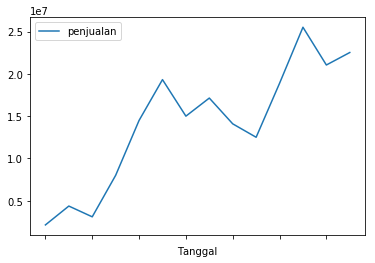

In [33]:
from matplotlib import pyplot

result.plot()
pyplot.show()